In [8]:
import geopandas
import numpy
import matplotlib.pyplot as plt
import geoplanar
from shapely.geometry import box, Polygon


## Violation: Slivers

<AxesSubplot:>

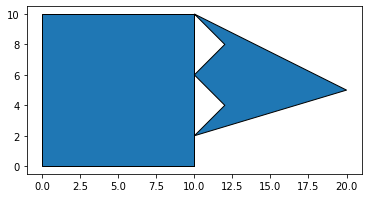

In [20]:
p1 = box(0,0,10,10)
p2 = Polygon([(10,10), (12,8), (10,6), (12,4), (10,2), (20,5)])

gdf = geopandas.GeoDataFrame(geometry=[p1,p2])
gdf.plot(edgecolor='k')

In [21]:
geoplanar.holes(gdf)

geometry
0 2  POLYGON ((10.00000 10.00000, 12.00000 8.00000,...
  3  POLYGON ((10.00000 6.00000, 12.00000 4.00000, ...

In [22]:
h = geoplanar.holes(gdf)

In [13]:
h.area.values

array([4., 4.])

In [14]:
gdf1 = geoplanar.fill_holes(gdf)

<AxesSubplot:>

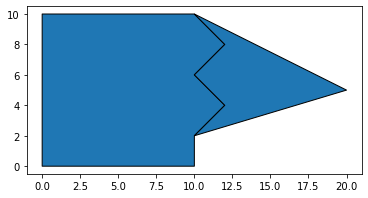

In [15]:
gdf1.plot(edgecolor='k')

In [23]:
gdf1.area

0    108.0
1     32.0
dtype: float64

In [24]:
gdf.area

0    100.0
1     32.0
dtype: float64

In [17]:
geoplanar.holes(gdf1)

Empty GeoDataFrame
Columns: [geometry]
Index: []

The default is to merge the sliver with the largest neighboring feature. 

To merge the sliver with the smallest neighboring feature set `Largest=False':

<AxesSubplot:>

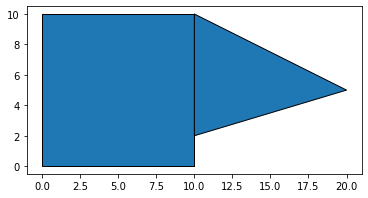

In [18]:
geoplanar.fill_holes(gdf, largest=False).plot(edgecolor='k')

In [19]:
geoplanar.fill_holes(gdf, largest=False).area

0    100.0
1     40.0
dtype: float64